In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
pd.set_option('display.max_columns', None)

* transformer les variables
* RFM checker 

In [2]:
datas = {}
files = os.listdir('./')
for file in files:
    if file[-3:] == "csv":
        print(file)
        datas[file] = pd.read_csv(file, header = 0)

achat_data.csv
clean_achat_data.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


# Table de localisation

In [3]:
print(datas['olist_geolocation_dataset.csv'].shape)
datas['olist_geolocation_dataset.csv'].head(3)
#ok_seller

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [4]:
print(pd.unique(datas['olist_geolocation_dataset.csv']["geolocation_state"]))
print("Il y a {0} états.".format(len(pd.unique(
    datas['olist_geolocation_dataset.csv']["geolocation_state"])
                                   )))

['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']
Il y a 27 états.


In [5]:
#les états ne correspondent pas forcément à des pays mais à des états fédérales

In [6]:
print("Il y a {0} zip code.".format(len(pd.unique(
    datas['olist_geolocation_dataset.csv']["geolocation_zip_code_prefix"])
                                   )))

Il y a 19015 zip code.


On utilise la longitude et latitude moyenne  pour chaque zip code

In [7]:
localisation = datas['olist_geolocation_dataset.csv'].groupby(by=["geolocation_zip_code_prefix"]).mean()

In [8]:
localisation = localisation.drop_duplicates() 

## Clients

In [9]:
print(datas['olist_customers_dataset.csv'].shape)
datas['olist_customers_dataset.csv'].head(3)
#ok

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [10]:
#print(pd.unique(datas['olist_customers_dataset.csv']["customer_id"]))
print("Il y a {0} clients.".format(len(pd.unique(
    datas['olist_customers_dataset.csv']["customer_unique_id"])) ))
print("Il y a {0} villes.".format(len(pd.unique(
    datas['olist_customers_dataset.csv']["customer_city"])) ))

Il y a 96096 clients.
Il y a 4119 villes.


In [11]:
clients = datas['olist_customers_dataset.csv']

## Commandes

In [12]:
print(datas['olist_orders_dataset.csv'].shape)
datas['olist_orders_dataset.csv'].head(3)
commandes_clients = datas['olist_orders_dataset.csv']

(99441, 8)


In [13]:
commandes_clients.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Produits achetés

In [14]:
print(datas['olist_order_items_dataset.csv'].shape)
datas['olist_order_items_dataset.csv'].head(3)
commandes_produits = datas['olist_order_items_dataset.csv']

(112650, 7)


In [15]:
print("Produits {0} vendus".format(len(
    pd.unique(datas['olist_order_items_dataset.csv']["product_id"])
    )))

Produits 32951 vendus


In [16]:
commandes_produits.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Paiements

In [17]:
print(datas['olist_order_payments_dataset.csv'].shape)
type_paiements = pd.get_dummies(datas['olist_order_payments_dataset.csv']["payment_type"])
paiments = datas['olist_order_payments_dataset.csv']
#concatenation 

(103886, 5)


In [18]:
paiments = pd.concat([paiments, type_paiements], axis = 1)
paiments = paiments.drop(["payment_type"], axis=1)

In [19]:
print("Il y a {0} moyen de paiements.".format(len(
    pd.unique(datas['olist_order_payments_dataset.csv']["payment_type"])
    )))
print(pd.unique(datas['olist_order_payments_dataset.csv']["payment_type"]))

Il y a 5 moyen de paiements.
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [20]:
paiments.head()

,order_id,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,0,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,0,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0,1,0,0,0


## Commentaires

In [21]:
print(datas['olist_order_reviews_dataset.csv'].shape)
commentaire = datas['olist_order_reviews_dataset.csv']

(100000, 7)


In [22]:
commentaire.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [23]:
print("Il y a {0} commentaires postés.".format(len(
    pd.unique(commentaire["order_id"])
    )))

Il y a 99441 commentaires postés.


array([[<AxesSubplot:title={'center':'review_score'}>]], dtype=object)

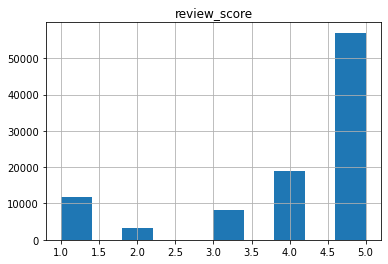

In [24]:
commentaire.groupby(by = "order_id").mean().hist()

In [25]:
note = commentaire.groupby(by = "order_id").mean()

## Caractéristique des produits

In [26]:
print(datas['olist_products_dataset.csv'].shape)
produit_info = datas['olist_products_dataset.csv']
produit_info.head(3)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


## Catégorie des produits

In [27]:
print(datas['product_category_name_translation.csv'].shape)
produit_name = datas['product_category_name_translation.csv']
produit_name.head(3)

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [28]:
print("Il y a {0} catégories de produits.".format(len(
    pd.unique(produit_name["product_category_name"])
    )))

Il y a 71 catégories de produits.


In [29]:
dico_produits = {}
keys = datas['product_category_name_translation.csv']["product_category_name"].values
trad = datas['product_category_name_translation.csv']["product_category_name_english"].values
for i in range(len(keys)):
    dico_produits[keys[i]] = trad[i]

## Vendeur

In [30]:
print(datas['olist_sellers_dataset.csv'].shape)
datas['olist_sellers_dataset.csv'].head(3)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [31]:
print("Il y a {0} vendeurs.".format(len(
    pd.unique(datas['olist_sellers_dataset.csv']["seller_id"])
    )))

Il y a 3095 vendeurs.


In [32]:
vendeur = datas['olist_sellers_dataset.csv']

In [33]:
#merge commandes_produits et produit_info
#produit_info[["product_id", "product_weight_g"]]
tmp = commandes_produits.merge(produit_info[["product_id", "product_weight_g"]], on ="product_id")
tmp = tmp[["order_id", "product_weight_g"]]
weight = tmp.groupby(by = ["order_id"]).sum().rename(columns={"product_weight_g" : "weight"})
quantity = tmp.groupby(by = ["order_id"]).count().rename(columns={"product_weight_g" : "quantity"})
#quantity

# Merge table

## Seller

In [34]:
vendeur = vendeur.merge(localisation, left_on='seller_zip_code_prefix', 
                           right_on='geolocation_zip_code_prefix', how="left")
vendeur.shape

(3095, 6)

In [35]:
vendeur.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


## Customers

In [36]:
achats = clients.merge(commandes_clients, 
        left_on="customer_id", right_on='customer_id', how="left")
# customer_unique_id est l'identifiant unique pour chaque client
print(pd.unique(achats["customer_unique_id"]).shape)

(96096,)


In [37]:
print(achats.shape)
achats.head(3)

(99441, 12)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


#### Commandes

On crée une sous table avec la somme des achats et les frais de port pour chaque commande

In [38]:
commandes_produits.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [39]:
#achats
panier = commandes_produits.loc[:, ["order_id", "price"]].groupby(by=["order_id"]).sum()

In [40]:
#frais de port
fret = commandes_produits.loc[:, ["order_id", "freight_value"]].groupby(by=["order_id"]).mean()

Fusion des paniers et frais de port avec customers

In [41]:
#fusion de la table customers avec le panier
achats = achats.merge(panier, on="order_id", how="left")
#fusion de la table customers avec les frais de ports
achats = achats.merge(fret, on="order_id", how="left")
achats.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00,22.25


## Moyen de paiement 

On concatène le moyen de paiement avec la table achat

In [42]:
paiments.head()

,order_id,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,0,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,0,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0,1,0,0,0


In [43]:
paiments.shape

(103886, 9)

In [44]:
paiments.groupby(by = ["order_id"]).mean()

,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
order_id,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1.0,2.0,72.19,0.0,1.0,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,1.0,3.0,259.83,0.0,1.0,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,1.0,5.0,216.87,0.0,1.0,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,1.0,2.0,25.78,0.0,1.0,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,1.0,3.0,218.04,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1.0,1.0,343.40,1.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,1.0,1.0,386.53,1.0,0.0,0.0,0.0,0.0
fffce4705a9662cd70adb13d4a31832d,1.0,3.0,116.85,0.0,1.0,0.0,0.0,0.0


In [45]:
big_table = achats.merge(paiments.groupby(by = ["order_id"]).mean(), on="order_id", how="left")

In [46]:
big_table

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99,21.88,1.0,2.0,146.87,0.0,1.0,0.0,0.0,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00,46.48,1.0,8.0,335.48,0.0,1.0,0.0,0.0,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94,17.79,1.0,7.0,157.73,0.0,1.0,0.0,0.0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94,23.36,1.0,1.0,173.30,0.0,1.0,0.0,0.0,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00,22.25,1.0,8.0,252.25,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,74.90,13.88,1.0,6.0,88.78,0.0,1.0,0.0,0.0,0.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,114.90,14.16,1.0,3.0,129.06,0.0,1.0,0.0,0.0,0.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,37.00,19.04,1.0,5.0,56.04,0.0,1.0,0.0,0.0,0.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,689.00,22.07,1.0,2.0,711.07,0.0,1.0,0.0,0.0,0.0


In [47]:
note

,review_score
order_id,
00010242fe8c5a6d1ba2dd792cb16214,5.0
00018f77f2f0320c557190d7a144bdd3,4.0
000229ec398224ef6ca0657da4fc703e,5.0
00024acbcdf0a6daa1e931b038114c75,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...
fffc94f6ce00a00581880bf54a75a037,5.0
fffcd46ef2263f404302a634eb57f7eb,5.0
fffce4705a9662cd70adb13d4a31832d,5.0


In [48]:
big_table = big_table.merge(weight, on="order_id", how="left")
big_table = big_table.merge(quantity, on="order_id", how="left")
big_table = big_table.merge(note, on="order_id", how="left")

In [49]:
new_data = big_table.drop(["order_status", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date", "payment_sequential"], axis = 1)

In [50]:
#Convertit les frais de port en ratio du prix total
new_data["freight_value"] = new_data["freight_value"]/new_data["price"]
new_data = new_data.rename(columns = {"freight_value": "freight_proportion_price"})

In [51]:
new_data.to_csv("achat_data.csv", index = False)